In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from plotly.offline import plot
import plotly.graph_objs as go
import plotly.figure_factory as ff

from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

### Problem 1 - Exploratory Data Analysis 

In [2]:
ratings = pd.read_csv('data_wholesale.csv')

In [3]:
ratings.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,userid
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,4
4,22615,5410,7198,3915,1777,5185,5


In [4]:
ratings.shape

(440, 7)

In [5]:
ratings[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [6]:
ratings[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].min()

Fresh                3
Milk                55
Grocery              3
Frozen              25
Detergents_Paper     3
Delicatessen         3
dtype: int64

### Problem 2 - Preparing the Data

In [7]:
spending = ratings.drop('userid',axis=1)

In [8]:
spending

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [9]:
spending['Milk'].max()

73498

In [10]:
scaler = StandardScaler()

In [11]:
spendingnorm = scaler.fit_transform(spending)

In [12]:
spendingnorm

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [13]:
spendingnorm = pd.DataFrame(spendingnorm,columns=spending.columns)

In [14]:
spendingnorm 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224
6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854
7,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601
8,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079
9,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461


In [15]:
spendingnorm['Grocery'].max()

8.936528306938083

### Problem 3.1 - Clustering

In [16]:
dendogram = ff.create_dendrogram(spendingnorm)
dendogram['layout'].update({'width':1024,'height':768})
plot(dendogram,filename='simpledendo.html')

'simpledendo.html'

### Problem 3.2 - Clustering

In [17]:
kmeans = KMeans(n_clusters=4, random_state=100)

In [18]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [19]:
kmeans.fit(spendingnorm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [20]:
inertia = kmeans.inertia_
labels = kmeans.labels_

In [21]:
labels

array([0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 2, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3,
       3, 3, 3, 1, 3, 3, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0, 1, 0, 3, 0, 1,
       0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0,

In [22]:
# Visualise the clusters
labels = pd.DataFrame(labels)

In [23]:
labels

,0
0,0
1,3
2,3
3,0
4,0
5,0
6,0
7,0
8,0
9,3


In [24]:
df = pd.concat([spendingnorm, labels], axis=1)

In [25]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,0
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,3
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,3
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,0
6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854,0
7,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601,0
8,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079,0
9,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461,3


In [26]:
df = df.rename(columns={0:'label'})

In [27]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,label
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,3
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,3
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,0
6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854,0
7,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601,0
8,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079,0
9,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461,3


In [28]:
df['label'].value_counts()

0    315
3    110
1     10
2      5
Name: label, dtype: int64

### Problem 5 - Understanding the Clusters 

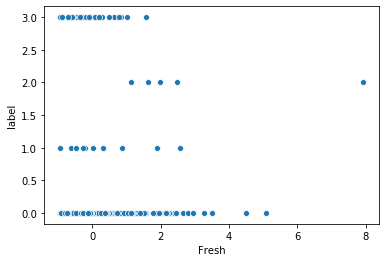

In [29]:
sns.scatterplot(x='Fresh',y='label',data=df)

In [ ]:
sns.scatterplot(x=df[['Fresh','Frozen']],y='label',data=df)